In [1]:
import requests
from bs4 import BeautifulSoup
import time
import re
from urllib.request import urlopen
from urllib.request import Request
from urllib.error import URLError
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split

In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time

years = list(range(2024, 2019, -1))
all_matches = []
standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"
visited_urls = set()  # To track visited URLs

for year in years:
    print(f"Fetching data for season {year}...")
    try:
        # Fetch the standings page
        data = requests.get(standings_url)
        if standings_url in visited_urls:
            print("Repeated URL detected. Stopping the loop.")
            break
        visited_urls.add(standings_url)

        soup = BeautifulSoup(data.text, 'html.parser')
        standings_table = soup.select('table.stats_table')[0]

        # Extract team URLs
        links = [l.get("href") for l in standings_table.find_all('a')]
        links = [l for l in links if '/squads/' in l]
        team_urls = [f"https://fbref.com{l}" for l in links]

        # Get the previous season URL
        prev_links = soup.select("a.prev")
        if not prev_links:
            print("No previous season link found. Stopping the loop.")
            break
        previous_season = prev_links[0].get("href")
        standings_url = f"https://fbref.com{previous_season}"

        # Loop through each team and get data
        for team_url in team_urls:
            team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
            print(f"Fetching data for {team_name}...")
            try:
                data = requests.get(team_url)
                matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
                soup = BeautifulSoup(data.text, 'html.parser')

                # Get shooting stats
                links = [l.get("href") for l in soup.find_all('a')]
                links = [l for l in links if l and 'all_comps/shooting/' in l]
                if not links:
                    print(f"No shooting data found for {team_name}")
                    continue

                shooting = pd.read_html(f"https://fbref.com{links[0]}", match="Shooting")[0]
                shooting.columns = shooting.columns.droplevel()

                # Merge matches and shooting data
                team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date", how='left')
                team_data = team_data[team_data["Comp"] == "Premier League"]
                team_data["Season"] = year
                team_data["Team"] = team_name
                all_matches.append(team_data)

            except Exception as e:
                print(f"Error fetching data for {team_name}: {e}")

            time.sleep(10)  # Be polite with requests

    except Exception as e:
        print(f"Error fetching standings for season {year}: {e}")
        break

# Combine all data
if all_matches:
    final_df = pd.concat(all_matches, ignore_index=True)
    print("Data fetching completed successfully!")
else:
    print("No data fetched.")

Fetching data for season 2024...
Fetching data for Liverpool...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Manchester City...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Nottingham Forest...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Brighton and Hove Albion...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Chelsea...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Arsenal...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Fulham...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Aston Villa...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Tottenham Hotspur...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Brentford...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Bournemouth...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Newcastle United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Manchester United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for West Ham United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Leicester City...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Everton...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Crystal Palace...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Wolverhampton Wanderers...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Ipswich Town...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Southampton...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for season 2023...
Fetching data for Manchester City...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Arsenal...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Liverpool...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Aston Villa...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Tottenham Hotspur...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Chelsea...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Newcastle United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Manchester United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for West Ham United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Crystal Palace...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Brighton and Hove Albion...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Bournemouth...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Fulham...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Wolverhampton Wanderers...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Everton...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Brentford...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Nottingham Forest...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Luton Town...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Burnley...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Sheffield United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for season 2022...
Fetching data for Manchester City...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Arsenal...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Manchester United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Newcastle United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Liverpool...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Brighton and Hove Albion...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Aston Villa...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Tottenham Hotspur...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Brentford...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Fulham...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Crystal Palace...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Chelsea...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Wolverhampton Wanderers...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for West Ham United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Bournemouth...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Nottingham Forest...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Everton...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Leicester City...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Leeds United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Southampton...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for season 2021...
Fetching data for Manchester City...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Liverpool...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Chelsea...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Tottenham Hotspur...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Arsenal...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Manchester United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for West Ham United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Leicester City...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Brighton and Hove Albion...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Wolverhampton Wanderers...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Newcastle United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Crystal Palace...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Brentford...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Aston Villa...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Southampton...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Everton...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Leeds United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Burnley...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Watford...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Norwich City...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for season 2020...
Fetching data for Manchester City...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Manchester United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Liverpool...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Chelsea...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Leicester City...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for West Ham United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Tottenham Hotspur...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Arsenal...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Leeds United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Everton...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Aston Villa...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Newcastle United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Wolverhampton Wanderers...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Crystal Palace...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Southampton...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Brighton and Hove Albion...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Burnley...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Fulham...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for West Bromwich Albion...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Fetching data for Sheffield United...


C:\Users\admin\AppData\Local\Temp\ipykernel_5840\4063153100.py:43: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]


Data fetching completed successfully!


In [10]:
print(team_data)

          Date   Time            Comp         Round  Day Venue Result GF GA  \
0   2020-09-14  18:00  Premier League   Matchweek 1  Mon  Home      L  0  2   
2   2020-09-21  18:00  Premier League   Matchweek 2  Mon  Away      L  0  1   
3   2020-09-27  12:00  Premier League   Matchweek 3  Sun  Home      L  0  1   
4   2020-10-04  14:00  Premier League   Matchweek 4  Sun  Away      L  1  2   
5   2020-10-18  12:00  Premier League   Matchweek 5  Sun  Home      D  1  1   
6   2020-10-24  20:00  Premier League   Matchweek 6  Sat  Away      L  1  2   
7   2020-10-31  12:30  Premier League   Matchweek 7  Sat  Home      L  0  1   
8   2020-11-07  17:30  Premier League   Matchweek 8  Sat  Away      L  1  4   
9   2020-11-22  14:00  Premier League   Matchweek 9  Sun  Home      L  0  1   
10  2020-11-28  20:00  Premier League  Matchweek 10  Sat  Away      L  0  1   
11  2020-12-06  14:15  Premier League  Matchweek 11  Sun  Home      L  1  2   
12  2020-12-13  12:00  Premier League  Matchweek 12 

In [6]:
ttable = pd.concat(all_matches)

In [7]:
ttable['GF'] = ttable['GF'].fillna(0).astype(int)
ttable['GA'] = ttable['GA'].fillna(0).astype(int)
ttable=ttable.reset_index()
ttable.drop('index',axis=1,inplace=True)

In [8]:
ttable.to_csv('ttable.csv')

In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from io import StringIO

years = list(range(2024, 2019, -1))
all_matches = []
standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

for year in years:
    data = requests.get(standings_url)
    soup = BeautifulSoup(data.text, 'html.parser')
    standings_table = soup.select('table.stats_table')

    if not standings_table:
        print(f"No league table found for {standings_url}")
        continue
    
    standings_table = standings_table[0]
    links = [l.get("href") for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]
    team_urls = [f"https://fbref.com{l}" for l in links]
    
    previous_season = soup.select("a.prev")
    if previous_season:
        standings_url = f"https://fbref.com{previous_season[0].get('href')}"
    else:
        print(f"No previous season link found for {standings_url}")
        break
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
        data = requests.get(team_url)
        
        # Wrap HTML text with StringIO for read_html
        matches = pd.read_html(StringIO(data.text), match="Scores & Fixtures")[0]
        soup = BeautifulSoup(data.text, 'html.parser')
        links = [l.get("href") for l in soup.find_all('a')]
        links = [l for l in links if l and 'all_comps/passing/' in l]
        
        if not links:
            print(f"No passing data link found for {team_name} in {year}")
            continue
        
        data = requests.get(f"https://fbref.com{links[0]}")
        passing = pd.read_html(StringIO(data.text), match="Passing")[0]
        passing.columns = passing.columns.droplevel()
        
        # Adjust columns to merge based on availability
        try:
            team_data1 = matches.merge(
                passing[["Date", "KP", "1/3", "PPA", "CrsPA", "PrgP"]], 
                on="Date", how="left"
            )
        except KeyError as e:
            print(f"KeyError for merging data of {team_name} in {year}: {e}")
            continue
        
        team_data1 = team_data1[team_data1["Comp"] == "Premier League"]
        team_data1["Season"] = year
        team_data1["Team"] = team_name
        all_matches.append(team_data1)
        time.sleep(10)

# To check collected data
if all_matches:
    ttable = pd.concat(all_matches, ignore_index=True)
    print(f"Collected data for {len(ttable)} matches.")
else:
    print("No matches collected.")


Collected data for 3800 matches.


In [40]:
assists = pd.concat(all_matches)
assists=assists.reset_index()
assists.drop('index',axis=1,inplace=True)

In [41]:
assists.to_csv('assists.csv')

In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from io import StringIO

years = list(range(2024, 2019, -1))
all_matches = []
standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

for year in years:
    data = requests.get(standings_url)
    soup = BeautifulSoup(data.text, 'html.parser')
    standings_table = soup.select('table.stats_table')

    if not standings_table:
        print(f"No league table found for {standings_url}")
        continue
    
    standings_table = standings_table[0]
    links = [l.get("href") for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]
    team_urls = [f"https://fbref.com{l}" for l in links]
    
    previous_season = soup.select("a.prev")
    if previous_season:
        standings_url = f"https://fbref.com{previous_season[0].get('href')}"
    else:
        print(f"No previous season link found for {standings_url}")
        break
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
        data = requests.get(team_url)
        
        # Wrap HTML text with StringIO for read_html
        matches = pd.read_html(StringIO(data.text), match="Scores & Fixtures")[0]
        soup = BeautifulSoup(data.text, 'html.parser')
        links = [l.get("href") for l in soup.find_all('a')]
        links = [l for l in links if l and 'all_comps/possession/' in l]
        
        if not links:
            print(f"No possession data link found for {team_name} in {year}")
            continue
        
        data = requests.get(f"https://fbref.com{links[0]}")
        possession = pd.read_html(StringIO(data.text), match="Possession")[0]
        possession.columns = possession.columns.droplevel()

        # Check if the required columns exist
        required_columns = ["Att 3rd", "Att Pen", "PrgC"]
        available_columns = [col for col in required_columns if col in possession.columns]

        if not available_columns:
            print(f"Required possession columns not found for {team_name} in {year}")
            continue

        try:
            # Only merge on available columns
            team_data2 = matches.merge(possession[["Date"] + available_columns], on="Date")
        except ValueError as e:
            print(f"Merge error for {team_name} in {year}: {e}")
            continue

        team_data2 = team_data2[team_data2["Comp"] == "Premier League"]
        team_data2["Season"] = year
        team_data2["Team"] = team_name
        all_matches.append(team_data2)
        time.sleep(10)

# Check if any data was collected
if all_matches:
    ttable = pd.concat(all_matches, ignore_index=True)
    print(f"Collected data for {len(ttable)} matches.")
else:
    print("No matches collected.")


Collected data for 3252 matches.


In [43]:
posses = pd.concat(all_matches)
posses=posses.reset_index()
posses.drop('index',axis=1,inplace=True)

In [44]:
# Save the possession data to a CSV file
posses.to_csv('possession.csv', index=False)


In [53]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from io import StringIO

years = list(range(2024, 2019, -1))
all_matches = []
standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

for year in years:
    data = requests.get(standings_url)
    soup = BeautifulSoup(data.text, 'html.parser')
    standings_table = soup.select('table.stats_table')

    if not standings_table:
        print(f"No league table found for {standings_url}")
        continue
    
    standings_table = standings_table[0]
    links = [l.get("href") for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]
    team_urls = [f"https://fbref.com{l}" for l in links]
    
    previous_season = soup.select("a.prev")
    if previous_season:
        standings_url = f"https://fbref.com{previous_season[0].get('href')}"
    else:
        print(f"No previous season link found for {standings_url}")
        break
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
        data = requests.get(team_url)
        
        # Wrap HTML text with StringIO for read_html
        matches = pd.read_html(StringIO(data.text), match="Scores & Fixtures")[0]
        soup = BeautifulSoup(data.text, 'html.parser')
        links = [l.get("href") for l in soup.find_all('a')]
        links = [l for l in links if l and 'all_comps/gca/' in l]
        
        if not links:
            print(f"No goal and shot creation data link found for {team_name} in {year}")
            continue
        
        data = requests.get(f"https://fbref.com{links[0]}")
        gfc = pd.read_html(StringIO(data.text), match="Goal and Shot Creation")[0]
        gfc.columns = gfc.columns.droplevel()

        # Check if the required columns exist
        if "Date" not in gfc.columns or "SCA" not in gfc.columns:
            print(f"Required columns not found for {team_name} in {year}")
            continue

        try:
            # Merge matches and goal/shot creation data
            team_data3 = matches.merge(gfc[["Date", "SCA"]], on="Date")
        except ValueError as e:
            print(f"Merge error for {team_name} in {year}: {e}")
            continue

        team_data3 = team_data3[team_data3["Comp"] == "Premier League"]    
        team_data3["Season"] = year
        team_data3["Team"] = team_name
        all_matches.append(team_data3)
        time.sleep(10)

# Check if any data was collected
if all_matches:
    ttable = pd.concat(all_matches, ignore_index=True)
    print(f"Collected data for {len(ttable)} matches.")
else:
    print("No matches collected.")


Collected data for 3252 matches.


In [54]:
creation = pd.concat(all_matches)
creation=creation.reset_index()
creation.drop('index',axis=1,inplace=True)

In [55]:
creation.to_csv('creation.csv')

In [56]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from io import StringIO

years = list(range(2024, 2019, -1))
all_matches = []
standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

for year in years:
    data = requests.get(standings_url)
    soup = BeautifulSoup(data.text, 'html.parser')
    
    # Check if standings table is available
    standings_table = soup.select('table.stats_table')
    if not standings_table:
        print(f"No table found for {standings_url}")
        continue
    
    standings_table = standings_table[0]
    links = [l.get("href") for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]
    team_urls = [f"https://fbref.com{l}" for l in links]
    
    # Fetch previous season URL
    previous_season = soup.select("a.prev")
    if not previous_season:
        print(f"No previous season link found for {standings_url}")
        break
    
    standings_url = f"https://fbref.com{previous_season[0].get('href')}"
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
        data = requests.get(team_url)
        
        # Read scores and fixtures using StringIO to avoid deprecation warnings
        matches = pd.read_html(StringIO(data.text), match="Scores & Fixtures")[0]
        soup = BeautifulSoup(data.text, 'html.parser')
        links = [l.get("href") for l in soup.find_all('a')]
        links = [l for l in links if l and 'all_comps/passing_types/' in l]
        
        if not links:
            print(f"No passing type link found for {team_name} in {year}")
            continue
        
        data = requests.get(f"https://fbref.com{links[0]}")
        passing_type = pd.read_html(StringIO(data.text), match="Pass Types")[0]
        passing_type.columns = passing_type.columns.droplevel()
        
        # Check if required columns exist before merging
        if "Date" not in passing_type.columns or "TB" not in passing_type.columns:
            print(f"Required columns not found for {team_name} in {year}")
            continue
        
        try:
            # Merge matches data with passing type data
            team_data5 = matches.merge(passing_type[["Date", "TB"]], on="Date")
        except ValueError as e:
            print(f"Merge error for {team_name} in {year}: {e}")
            continue
        
        team_data5 = team_data5[team_data5["Comp"] == "Premier League"]
        team_data5["Season"] = year
        team_data5["Team"] = team_name
        all_matches.append(team_data5)
        time.sleep(10)

# Combine all collected data if any
if all_matches:
    full_table = pd.concat(all_matches, ignore_index=True)
    print(f"Collected data for {len(full_table)} matches.")
else:
    print("No matches collected.")


Collected data for 3252 matches.


In [57]:
back1=pd.concat(all_matches)
back1=back1.reset_index()
back1.drop('index',axis=1,inplace=True)

In [58]:
back1.to_csv('back1.csv', index=False)


In [59]:
ttable = pd.read_csv('ttable.csv')
assists = pd.read_csv('assists.csv')
posses = pd.read_csv('possession.csv')
creation = pd.read_csv('creation.csv')
back1 = pd.read_csv('back1.csv')

In [173]:
import pandas as pd

def season(x):
    mainseas = ttable[ttable['Season'] == x]
    ass = assists[assists['Season'] == x]
    poss = posses[posses['Season'] == x]
    cre = creation[creation['Season'] == x]
    back = back1[back1['Season'] == x]

    feat = ["Sh", "SoT", "Dist", "FK", "PK", "PKatt", 'GF', 'GA', 'xG', 'xGA', 'Poss',
            "KP", "1/3", "PPA", "CrsPA", "Prog", "Att 3rd", "Att Pen", "Prog", 'SCA', 'TB']
    df = pd.DataFrame()
    df['Team'] = mainseas['Team'].unique()
    
    # Initialize columns with zeros
    for i in feat:
        df[i] = 0.0

    main = ["Sh", "SoT", "Dist", "FK", "PK", "PKatt", 'GF', 'GA', 'xG', 'xGA', 'Poss']
    asss = ["KP", "1/3", "PPA", "CrsPA", "PrgP"]
    posss = ["Att 3rd", "Att Pen", "PrgC"]
    gfc = ['SCA']
    tb = ['TB']
    feat1 = [main, asss, poss, gfc, tb]
    tables = [mainseas, ass, poss, cre, back]


    # Assign main features
    for j in main:
        for i in range(len(df)):
            df.loc[i, j] = mainseas[mainseas['Team'] == df.loc[i, 'Team']][j].mean()

    # Assign assist features
    for j in asss:
        for i in range(len(df)):
            df.loc[i, j] = ass[ass['Team'] == df.loc[i, 'Team']][j].mean()

    # Assign possession features
    for j in posss:
        for i in range(len(df)):
            df.loc[i, j] = poss[poss['Team'] == df.loc[i, 'Team']][j].mean()

    # Special feature assignments
    for i in range(len(df)):
        df.loc[i, 'SCA'] = cre[cre['Team'] == df.loc[i, 'Team']]['SCA'].mean()
    for i in range(len(df)):
        df.loc[i, 'TB'] = back[back['Team'] == df.loc[i, 'Team']]['TB'].mean()

    # Add Season, Points, and Points per match columns
    df['Season'] = x
    df['Points'] = 0
    df['Points per match'] = 0.0
    
    for i in range(len(df)):
        win_count = mainseas[mainseas['Team'] == df.loc[i, 'Team']]['Result'].value_counts().get('W', 0)
        draw_count = mainseas[mainseas['Team'] == df.loc[i, 'Team']]['Result'].value_counts().get('D', 0)
        df.loc[i, 'Points'] = win_count * 3 + draw_count
    
    for i in range(len(df)):
        df.loc[i, 'Points per match'] = df.loc[i, 'Points'] / len(mainseas[mainseas['Team'] == df.loc[i, 'Team']])
    
    return df

# Creating DataFrames for different seasons
seas19 = season(2019)
seas20 = season(2020)
seas21 = season(2021)
seas22 = season(2022)
seas23 = season(2023)
seas24 = season(2024)

# Concatenating all the seasons' DataFrames
total = pd.concat([seas19, seas20, seas21, seas22, seas23, seas24])


In [62]:
total.to_csv('Final_Data.csv')

In [63]:
print(total.columns)

Index(['Team', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt', 'GF', 'GA', 'xG',
       'xGA', 'Poss', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'Att 3rd',
       'Att Pen', 'SCA', 'TB', 'Season', 'Points', 'Points per match', 'PrgP',
       'PrgC'],
      dtype='object')


In [64]:
print(total.head())

                Team         Sh       SoT       Dist        FK        PK  \
0    Manchester City  15.526316  5.552632  17.257895  0.552632  0.131579   
1  Manchester United  13.552632  5.157895  18.118421  0.552632  0.263158   
2          Liverpool  15.842105  5.368421  17.342105  0.578947  0.157895   
3            Chelsea  14.368421  5.078947  17.371053  0.421053  0.210526   
4     Leicester City  12.447368  4.473684  19.039474  0.526316  0.263158   

      PKatt        GF        GA        xG  ...  Prog     Att 3rd    Att Pen  \
0  0.236842  2.184211  0.842105  1.797368  ...   0.0  223.789474  31.473684   
1  0.289474  1.921053  1.157895  1.576316  ...   0.0  192.710526  24.236842   
2  0.157895  1.789474  1.105263  1.781579  ...   0.0  216.894737  31.868421   
3  0.263158  1.526316  0.947368  1.642105  ...   0.0  192.315789  26.763158   
4  0.315789  1.789474  1.315789  1.476316  ...   0.0  149.315789  20.315789   

         SCA        TB  Season  Points  Points per match       PrgP 

In [182]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def fetch_url(url, sleep_time=10):
    """Fetch the URL with retries and delay."""
    for _ in range(3):  # Retry up to 3 times
        response = requests.get(url)
        if response.status_code == 200:
            return response
        print(f"Failed request with status {response.status_code}. Retrying...")
        time.sleep(sleep_time)
    return None

def scrape_premier_league_data():
    standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"
    years = list(range(2024, 2018, -1))
    all_matches = []

    for year in years:
        print(f"Fetching data for season {year}...")
        response = fetch_url(standings_url)
        if not response:
            print(f"Skipping {year} due to repeated request failures.")
            continue

        time.sleep(10)
        soup = BeautifulSoup(response.text, "html.parser")
        standings_table = soup.select('table.stats_table')
        if not standings_table:
            print(f"No standings table found for {year}.")
            continue

        links = [l.get("href") for l in standings_table[0].find_all('a') if l.get("href") and '/squads/' in l.get("href")]
        team_urls = [f"https://fbref.com{l}" for l in links]

        # Find the link for the previous season
        previous_season = soup.select("a.prev")
        if previous_season:
            standings_url = f"https://fbref.com{previous_season[0].get('href')}"
        else:
            print(f"No previous season link found for {year}.")
            break

        for team_url in team_urls:
            try:
                team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
                team_response = fetch_url(team_url)
                if not team_response:
                    print(f"Skipping {team_name} due to request failure.")
                    continue
                time.sleep(10)
                
                matches = pd.read_html(team_response.text, match="Scores & Fixtures")[0]
                
                soup_team = BeautifulSoup(team_response.text, "html.parser")
                
                # Scrape Shooting Data
                shooting_links = [l.get("href") for l in soup_team.find_all('a') if l and 'all_comps/shooting/' in l]
                if shooting_links:
                    shooting_response = fetch_url(f"https://fbref.com{shooting_links[0]}")
                    if shooting_response:
                        shooting = pd.read_html(shooting_response.text, match="Shooting")[0]
                        shooting.columns = shooting.columns.droplevel()
                        matches = matches.merge(shooting[['Date', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt']], on="Date", how="left")
                
                # Scrape Passing Data
                passing_links = [l.get("href") for l in soup_team.find_all('a') if l and 'all_comps/passing/' in l]
                if passing_links:
                    passing_response = fetch_url(f"https://fbref.com{passing_links[0]}")
                    if passing_response:
                        passing = pd.read_html(passing_response.text, match="Passing")[0]
                        passing.columns = passing.columns.droplevel()
                        matches = matches.merge(passing[['Date', 'KP', '1/3', 'PPA', 'CrsPA', 'Prgp']], on="Date", how="left")
                
                # Add more data scraping sections (Pass Types, Goal and Shot Creation, Possession) as shown in the original code...
                
                # Add team and season info
                matches["Season"] = year
                matches["Team"] = team_name
                all_matches.append(matches)

            except Exception as e:
                print(f"Error processing team {team_name} in {year}: {e}")
                continue

    # Combine all dataframes
    final_df = pd.concat(all_matches, ignore_index=True)
    final_df.columns = [c.lower() for c in final_df.columns]
    return final_df


In [183]:
final_df.to_csv('fix.csv')

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [128]:
ttotal = pd.read_csv(r'FFinal_Data.csv')

In [136]:
filtered_total = ttotal.drop(columns=['Prog', 'sno'])

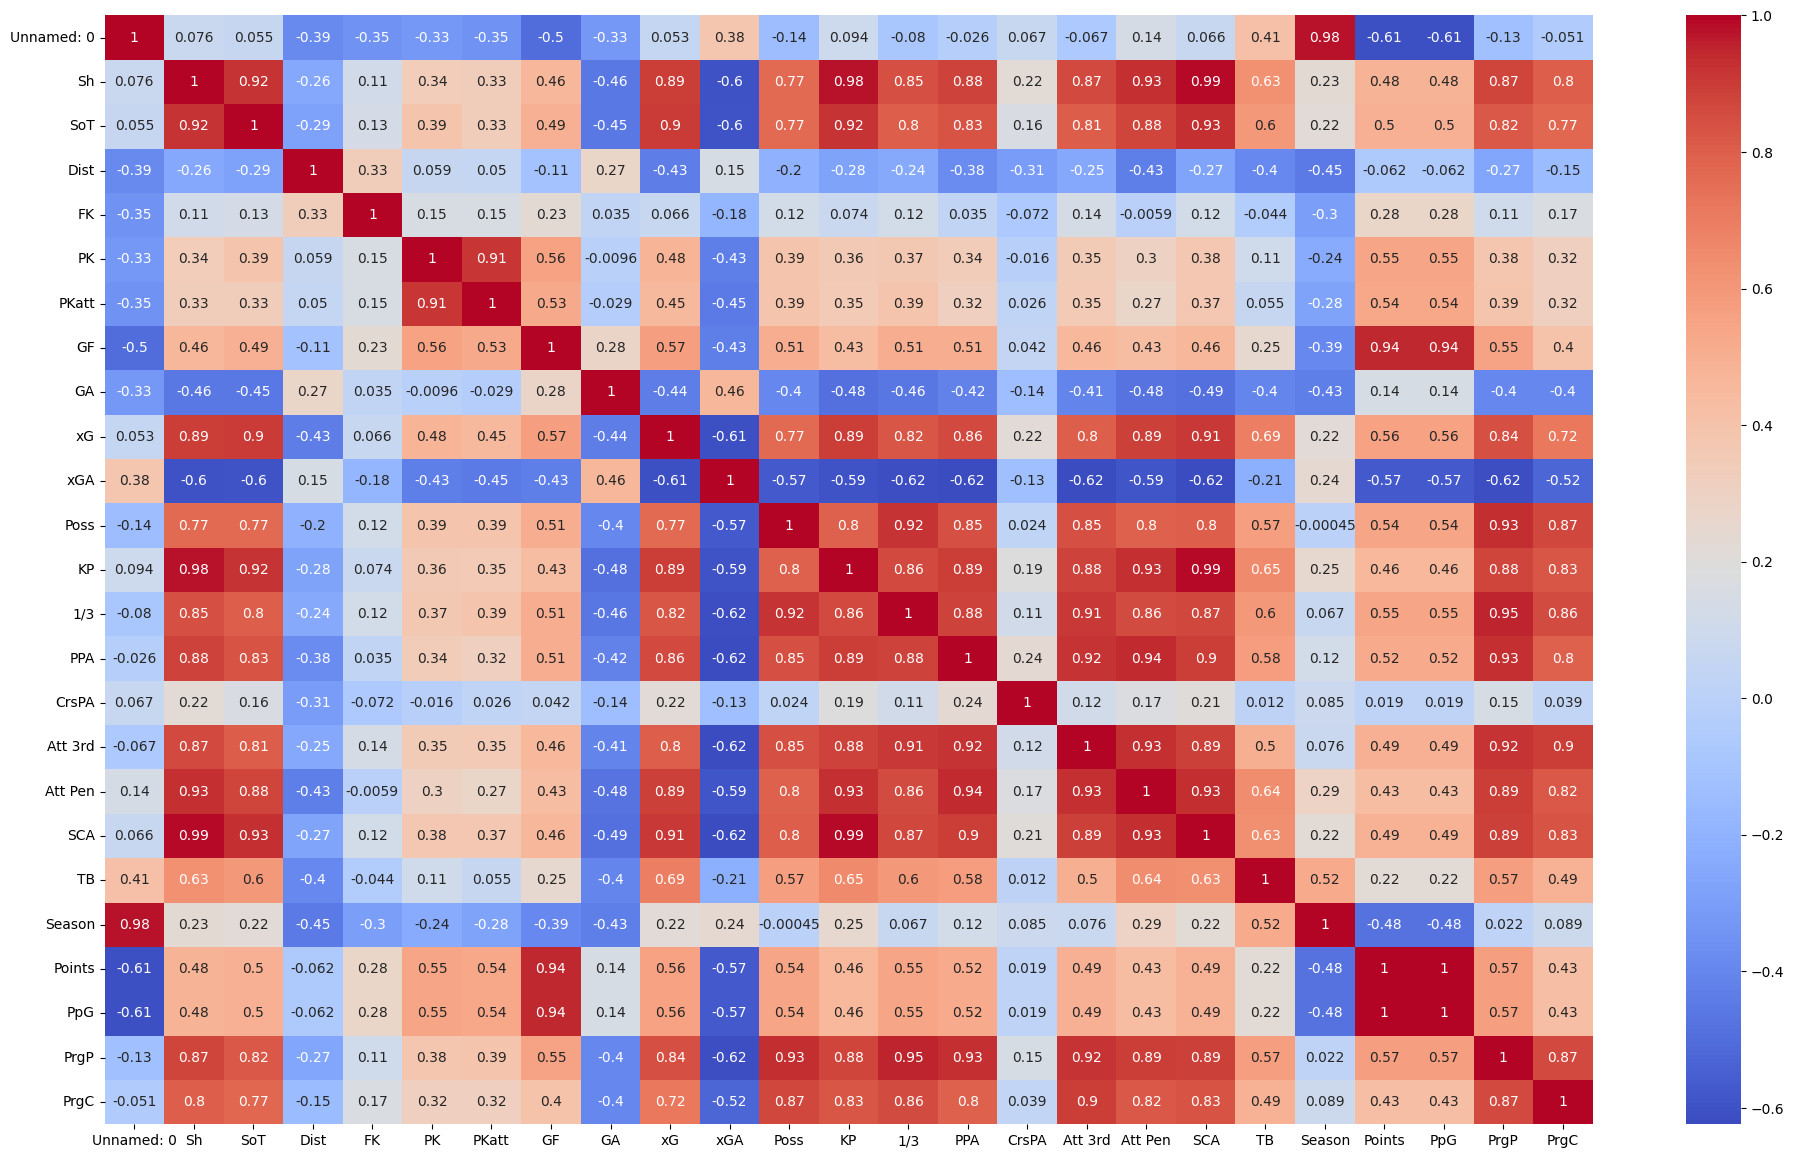

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `total` is already loaded and columns 'prog' and 'sno' are dropped

# Select only numeric columns
filtered_total_numeric = filtered_total.select_dtypes(include=['number'])

# Adjust size dynamically based on the number of numeric columns
num_cols = filtered_total_numeric.shape[1]
figsize = (24, 24 * 0.6)

# Create the heatmap
plt.figure(figsize=figsize)
sns.heatmap(filtered_total_numeric.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [138]:
plt.savefig(r'heatmap.png', bbox_inches='tight')

<Figure size 2000x800 with 0 Axes>

In [131]:
from sklearn.model_selection import train_test_split
X=ttotal.drop(['Points','Season','Team','PpG'],axis=1)
y=ttotal['Points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
seas24_test=seas24

In [175]:
print(seas24.head())

                       Team         Sh       SoT       Dist        FK  \
0                 Liverpool  13.909091  5.727273  16.436364  0.272727   
1           Manchester City  19.181818  6.545455  17.118182  0.545455   
2         Nottingham Forest  14.700000  5.300000  18.480000  0.500000   
3  Brighton and Hove Albion  14.454545  4.636364  16.800000  0.909091   
4                   Chelsea  13.600000  5.100000  16.330000  0.400000   

         PK     PKatt        GF        GA        xG  ...  Prog     Att 3rd  \
0  0.181818  0.181818  0.552632  0.157895  1.818182  ...   0.0  162.090909   
1  0.090909  0.090909  0.578947  0.342105  2.000000  ...   0.0  329.272727   
2  0.100000  0.100000  0.368421  0.184211  1.360000  ...   0.0  150.400000   
3  0.000000  0.000000  0.500000  0.394737  1.481818  ...   0.0  159.272727   
4  0.100000  0.100000  0.526316  0.315789  1.820000  ...   0.0  154.800000   

     Att Pen        SCA        TB       PrgP       PrgC  Season  Points  \
0  29.727273  25.

In [151]:
knn = KNeighborsRegressor(n_neighbors=12)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)
cb  = CatBoostRegressor(learning_rate =.07, max_depth =7, verbose=0)

regressors = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]

K Nearest Neighbours : 73 %
Decision Tree : 87 %
Random Forest : 95 %
AdaBoost : 95 %
Gradient Boosting Regressor : 90 %
XGBRegressor : 95 %
CatBoostRegressor : 90 %


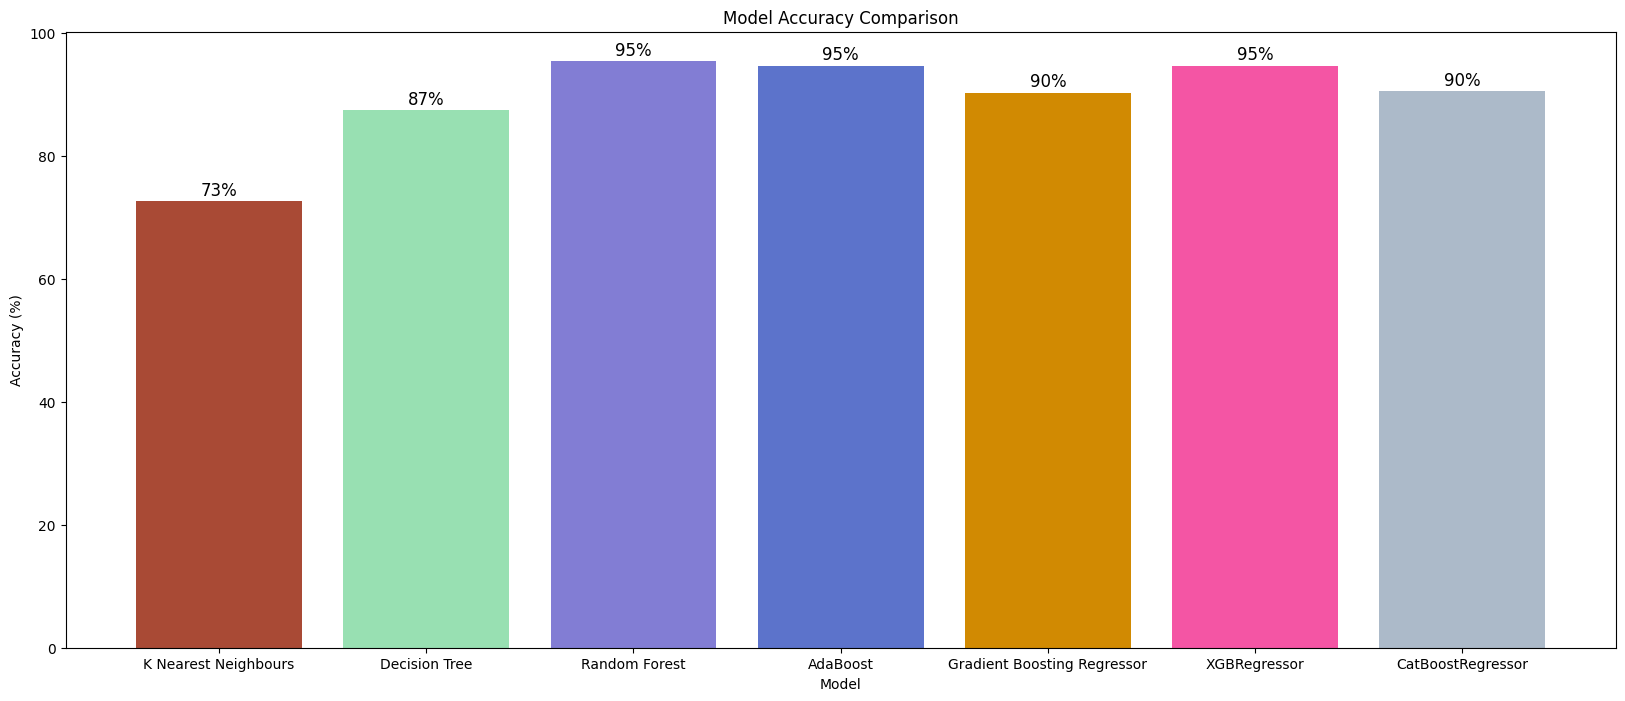

In [152]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.metrics import r2_score

for regressor_name, regressor in regressors:
    regressor.fit(X_train, y_train)  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test, y_pred), 3) * 100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    
    # Generate a random color
    random_color = [random.random() for _ in range(3)]
    plt.rcParams["figure.figsize"] = (20, 8)
    plt.bar(regressor_name, accuracy, color=random_color)
    
    # Annotate each bar with the accuracy value
    plt.text(regressor_name, accuracy + 1, f'{accuracy:.0f}%', ha='center', fontsize=12)

plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.show()


In [79]:
plt.savefig(r'reg_accu.png', bbox_inches='tight')

<Figure size 2000x800 with 0 Axes>

In [176]:
seas24_copy=seas24_test

In [177]:
print(seas24_copy.head())

                       Team         Sh       SoT       Dist        FK  \
0                 Liverpool  13.909091  5.727273  16.436364  0.272727   
1           Manchester City  19.181818  6.545455  17.118182  0.545455   
2         Nottingham Forest  14.700000  5.300000  18.480000  0.500000   
3  Brighton and Hove Albion  14.454545  4.636364  16.800000  0.909091   
4                   Chelsea  13.600000  5.100000  16.330000  0.400000   

         PK     PKatt        GF        GA        xG  ...  Prog     Att 3rd  \
0  0.181818  0.181818  0.552632  0.157895  1.818182  ...   0.0  162.090909   
1  0.090909  0.090909  0.578947  0.342105  2.000000  ...   0.0  329.272727   
2  0.100000  0.100000  0.368421  0.184211  1.360000  ...   0.0  150.400000   
3  0.000000  0.000000  0.500000  0.394737  1.481818  ...   0.0  159.272727   
4  0.100000  0.100000  0.526316  0.315789  1.820000  ...   0.0  154.800000   

     Att Pen        SCA        TB       PrgP       PrgC  Season  Points  \
0  29.727273  25.

In [178]:
seas24_copy.drop(['Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt', 'GF', 'GA', 'xG',
       'xGA', 'Poss', 'KP', '1/3', 'PPA', 'CrsPA' , 'Att 3rd',
       'Att Pen', 'SCA', 'TB', 'Prog'],axis=1,inplace=True)

In [179]:
print(seas24_copy.head())

                       Team       PrgP       PrgC  Season  Points  \
0                 Liverpool  42.181818  20.181818    2024      28   
1           Manchester City  58.181818  37.454545    2024      23   
2         Nottingham Forest  29.800000  19.100000    2024      19   
3  Brighton and Hove Albion  44.818182  20.636364    2024      19   
4                   Chelsea  37.300000  22.100000    2024      18   

   Points per match  
0          0.736842  
1          0.605263  
2          0.500000  
3          0.500000  
4          0.473684  


In [185]:
fix=pd.read_csv(r'fix.csv')

In [186]:
seas24_copy['Predicted Points XGB']=0.0
for i in range(len(seas24_copy['Team'].unique())):
    seas24_copy['Predicted Points XGB'][i]=seas24_copy['Points per match'][i]*(38-len(fix[(fix['Team']==seas24_copy['Team'][i])&(fix['Season']==2024)]))+seas24_copy['Points'][i]

C:\Users\admin\AppData\Local\Temp\ipykernel_5840\3006510771.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  seas24_copy['Predicted Points XGB'][i]=seas24_copy['Points per match'][i]*(38-len(fix[(fix['Team']==seas24_copy['Team'][i])&(fix[

In [ ]:
seas24_copy['Predicted Points AdaBoost']=0.0
for i in range(len(seas24_copy['Team'].unique())):
    seas24_copy['Predicted Points AdaBoost'][i]=seas24_copy['AdaBoost PPg'][i]*(38-len(fix[(fix['Team']==seas24_copy['Team'][i])&(fix['Season']==2024)]))+seas24_copy['Points'][i]